# Population of India in Comparison to Other Countries of the World #

*Submitted for fulfilling the requirement of edX Mini project by <b>Vinod Rowmuria</b>, Mumbai*<br />

This jupyter notebook compares the population scenario of India in comparison to some other countries of the world. The data is obtained from the World Development Indicators dataset from the Kaggle site:
https://www.kaggle.com/worldbank/world-development-indicators/version/2<br />

### Objective for the analysis: ##
India is an emerging economy in Asia. India is the seventh largest nation of the world. It is the second highly populated country in the world after China, followed by USA as third. I am curious to see how India compares, in terms of population growth, population density, etc., with other populated countries of the world.<br />

### My assumptions before analysis: ##
1. Population in India is growing continuously through the years.
2. India’s population density in one of the highest in comparison to other countries of the world.
3. Population density and population growth goes hand in hand, i.e., if one is high other should also be high.

## Initial study of the dataset ##

In [1]:
# Importing pandas, numpy, and matplotlib libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the World Development Indicators dataset

data = pd.read_csv('World-Development-Indicators/Indicators.csv')
data.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


First just checking what kind of indicators are present in the dataset on the "**Population**" topic:

In [3]:
# Like in SQL queries, selecting IndicatorName containing the string "Population" in the above dataset

pop_data = data.loc[data['IndicatorName'].str.contains('Population')]
pop_data.tail(12)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5640934,Zambia,ZMB,"Population, total",SP.POP.TOTL,2014,1.572134e+07
5641514,Zimbabwe,ZWE,Population ages 65 and above (% of total),SP.POP.65UP.TO.ZS,2014,3.001170e+00
5641515,Zimbabwe,ZWE,Population density (people per sq. km of land ...,EN.POP.DNST,2014,3.941025e+01
5641516,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,2014,2.307451e+00
5641517,Zimbabwe,ZWE,Population in largest city,EN.URB.LCTY,2014,1.494660e+06
5641518,Zimbabwe,ZWE,Population in the largest city (% of urban pop...,EN.URB.LCTY.UR.ZS,2014,3.016435e+01
5641519,Zimbabwe,ZWE,Population in urban agglomerations of more tha...,EN.URB.MCTY,2014,1.494660e+06
5641520,Zimbabwe,ZWE,Population in urban agglomerations of more tha...,EN.URB.MCTY.TL.ZS,2014,9.803714e+00
5641521,Zimbabwe,ZWE,"Population, ages 0-14 (% of total)",SP.POP.0014.TO.ZS,2014,4.158379e+01
5641522,Zimbabwe,ZWE,"Population, ages 15-64 (% of total)",SP.POP.1564.TO.ZS,2014,5.541504e+01


### Selecting indicators for analysis ###

The following indicators are selected from the column **IndicatorName** in the above dataset:
* Population density (people per sq. km of land...
* Population growth (annual %)
* Population, total

These indications are selected to analyse the relations between **population density**, **population growth**, and **total population** of India in comparision to some other countries of the world.<br />

First, comparing **Population Density** data of **India** with two other countries say, **China** and **USA**:

In [4]:
# Selecting IndicatorName containing string "Population density" for the countries India, China, and USA

pop_ind_den = data.loc[data['IndicatorName'].str.contains('Population density')
                       & data['CountryCode'].str.contains('IND')]
pop_chn_den = data.loc[data['IndicatorName'].str.contains('Population density')
                       & data['CountryCode'].str.contains('CHN')]
pop_usa_den = data.loc[data['IndicatorName'].str.contains('Population density')
                       & data['CountryCode'].str.contains('USA')]
pop_ind_den.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
36702,India,IND,Population density (people per sq. km of land ...,EN.POP.DNST,1961,154.275864
64245,India,IND,Population density (people per sq. km of land ...,EN.POP.DNST,1962,157.424902
92695,India,IND,Population density (people per sq. km of land ...,EN.POP.DNST,1963,160.679256
121494,India,IND,Population density (people per sq. km of land ...,EN.POP.DNST,1964,164.029246
152171,India,IND,Population density (people per sq. km of land ...,EN.POP.DNST,1965,167.470047


In [5]:
pop_chn_den.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
31563,China,CHN,Population density (people per sq. km of land ...,EN.POP.DNST,1961,70.335792
58744,China,CHN,Population density (people per sq. km of land ...,EN.POP.DNST,1962,70.915240
87128,China,CHN,Population density (people per sq. km of land ...,EN.POP.DNST,1963,72.679679
115854,China,CHN,Population density (people per sq. km of land ...,EN.POP.DNST,1964,74.386068
145760,China,CHN,Population density (people per sq. km of land ...,EN.POP.DNST,1965,76.178734


In [6]:
pop_usa_den.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
48845,United States,USA,Population density (people per sq. km of land ...,EN.POP.DNST,1961,20.055880
77233,United States,USA,Population density (people per sq. km of land ...,EN.POP.DNST,1962,20.366723
105854,United States,USA,Population density (people per sq. km of land ...,EN.POP.DNST,1963,20.661953
134892,United States,USA,Population density (people per sq. km of land ...,EN.POP.DNST,1964,20.950959
166830,United States,USA,Population density (people per sq. km of land ...,EN.POP.DNST,1965,21.214527


In [7]:
# Checking the range of years in the above DataFrames

yrs_ind = pop_ind_den['Year'].unique().tolist()
yrs_chn = pop_chn_den['Year'].unique().tolist()
yrs_usa = pop_usa_den['Year'].unique().tolist()

print("For Population Density data")
print("Range of Years for India:", min(yrs_ind), "-", max(yrs_ind), "| No. of years:", len(yrs_ind))
print("Range of Years for China:", min(yrs_chn), "-", max(yrs_chn), "| No. of years:", len(yrs_chn))
print("Range of Years for USA:", min(yrs_usa), "-", max(yrs_usa), "| No. of years:", len(yrs_usa))

For Population Density data
Range of Years for India: 1961 - 2014 | No. of years: 54
Range of Years for China: 1961 - 2014 | No. of years: 54
Range of Years for USA: 1961 - 2014 | No. of years: 54


In [8]:
# Checking the range of Population Density data in the above DataFrames

p_den1 = pop_ind_den['Value']
p_den2 = pop_chn_den['Value']
p_den3 = pop_usa_den['Value']

print("For Population Density data")
print("India - Max Value:", max(p_den1), "| Min Value:", min(p_den1))
print("China - Max Value:", max(p_den2), "| Min Value:", min(p_den2))
print("USA - Max Value:", max(p_den3), "| Min Value:", min(p_den3))

For Population Density data
India - Max Value: 435.657170581093 | Min Value: 154.27586430736
China - Max Value: 145.317355990401 | Min Value: 70.3357920805262
USA - Max Value: 34.8575943818038 | Min Value: 20.0558797068663


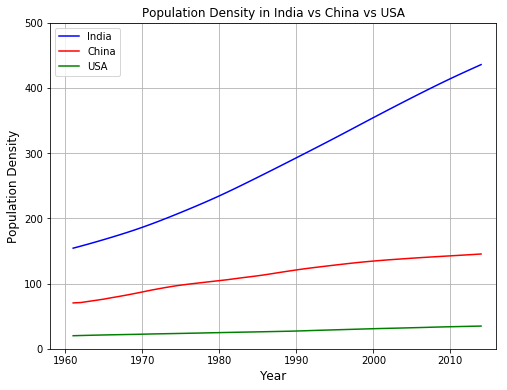

In [9]:
# Create line plots on Population Density for each country India, China, and USA

# Defining the axes
x_ind = pop_ind_den[['Year']]
y_ind = pop_ind_den[['Value']]

x_chn = pop_chn_den[['Year']]
y_chn = pop_chn_den[['Value']]

x_usa = pop_usa_den[['Year']]
y_usa = pop_usa_den[['Value']]

fig = plt.figure(figsize=(8,6))

plt.plot(x_ind, y_ind, 'b-', label='India')
plt.plot(x_chn, y_chn, 'r-', label='China')
plt.plot(x_ind, y_usa, 'g-', label='USA')

# Create a legend
plt.legend(loc='upper left')

# Label the axes
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population Density', fontsize=12)

# Label the plot
plt.title('Population Density in India vs China vs USA')

# To make more honest, starting y axis at 0
plt.axis([1958, 2016, 0, 500])
plt.grid(True)

plt.show(fig)

### Finding 1: ###
Population Density, measured as people per sq. km of land area, is increasing tremendously in India as compared to China and USA. In USA the Population Density increase has already reached an almost flat stage.

Next, comparing **Population Growth** data of **India** with the other two countries:

In [10]:
# Selecting IndicatorName containing string "Population growth" for the countries India, China, and USA

pop_ind_gth = data.loc[data['IndicatorName'].str.contains('Population growth')
                       & data['CountryCode'].str.contains('IND')]
pop_chn_gth = data.loc[data['IndicatorName'].str.contains('Population growth')
                       & data['CountryCode'].str.contains('CHN')]
pop_usa_gth = data.loc[data['IndicatorName'].str.contains('Population growth')
                       & data['CountryCode'].str.contains('USA')]
pop_ind_gth.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11750,India,IND,Population growth (annual %),SP.POP.GROW,1960,1.952206
36703,India,IND,Population growth (annual %),SP.POP.GROW,1961,1.988187
64246,India,IND,Population growth (annual %),SP.POP.GROW,1962,2.020621
92696,India,IND,Population growth (annual %),SP.POP.GROW,1963,2.046165
121495,India,IND,Population growth (annual %),SP.POP.GROW,1964,2.063456


In [11]:
pop_chn_gth.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7241,China,CHN,Population growth (annual %),SP.POP.GROW,1960,1.832868
31564,China,CHN,Population growth (annual %),SP.POP.GROW,1961,-1.015528
58745,China,CHN,Population growth (annual %),SP.POP.GROW,1962,0.820456
87129,China,CHN,Population growth (annual %),SP.POP.GROW,1963,2.457647
115855,China,CHN,Population growth (annual %),SP.POP.GROW,1964,2.320683


In [12]:
pop_usa_gth.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22366,United States,USA,Population growth (annual %),SP.POP.GROW,1960,1.701993
48846,United States,USA,Population growth (annual %),SP.POP.GROW,1961,1.657730
77234,United States,USA,Population growth (annual %),SP.POP.GROW,1962,1.537997
105855,United States,USA,Population growth (annual %),SP.POP.GROW,1963,1.439165
134893,United States,USA,Population growth (annual %),SP.POP.GROW,1964,1.389046


In [13]:
# Checking the range of years for the above DataFrames

yrs_ind = pop_ind_gth['Year'].unique().tolist()
yrs_chn = pop_chn_gth['Year'].unique().tolist()
yrs_usa = pop_usa_gth['Year'].unique().tolist()

print("For Population Growth data")
print("Range of years for India:", min(yrs_ind), "-", max(yrs_ind), "| No. of years:", len(yrs_ind))
print("Range of years for China:", min(yrs_chn), "-", max(yrs_chn), "| No. of years:", len(yrs_chn))
print("Range of years for USA:", min(yrs_usa), "-", max(yrs_usa), "| No. of years:", len(yrs_usa))

For Population Growth data
Range of years for India: 1960 - 2014 | No. of years: 55
Range of years for China: 1960 - 2014 | No. of years: 55
Range of years for USA: 1960 - 2014 | No. of years: 55


In [14]:
# Checking the range of Population Growth data in the above DataFrames

p_den1 = pop_ind_gth['Value']
p_den2 = pop_chn_gth['Value']
p_den3 = pop_usa_gth['Value']

print("For Population Growth data")
print("India - Max Value:", max(p_den1), "| Min Value:", min(p_den1))
print("China - Max Value:", max(p_den2), "| Min Value:", min(p_den2))
print("USA - Max Value:", max(p_den3), "| Min Value:", min(p_den3))

For Population Growth data
India - Max Value: 2.33079891921059 | Min Value: 1.2267302957278898
China - Max Value: 2.78733183821693 | Min Value: -1.01552778731319
USA - Max Value: 1.70199277744096 | Min Value: 0.742746143848123


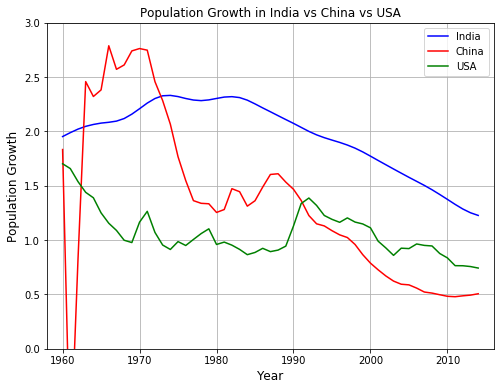

In [15]:
# Create line plots on Population Growth for each country India, China, and USA

# Defining the axes
x_ind = pop_ind_gth[['Year']]
y_ind = pop_ind_gth[['Value']]

x_chn = pop_chn_gth[['Year']]
y_chn = pop_chn_gth[['Value']]

x_usa = pop_usa_gth[['Year']]
y_usa = pop_usa_gth[['Value']]

fig = plt.figure(figsize=(8,6))

plt.plot(x_ind, y_ind, 'b-', label='India')
plt.plot(x_chn, y_chn, 'r-', label='China')
plt.plot(x_ind, y_usa, 'g-', label='USA')

# Create a legend
plt.legend(loc='upper right')

# Label the axes
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population Growth', fontsize=12)

# Label the plot
plt.title('Population Growth in India vs China vs USA')

# To make more honest, starting y axis at 0
plt.axis([1958, 2016, 0, 3])
plt.grid(True)

plt.show(fig)

### Finding 2: ###
Population Growth, measured as annual percentage growth in population per million, is actually decreasing in all the three countries India, China, and USA.

* In USA, the population growth is decreasing in a rather rough pattern as shown by the green line in the plot.
* In China, the population growth increased sharply after 1960, reached peak in around 1970-71, then decreased sharply in the next 10 years till 1980-81. Then with a small interval of population growth till late 80s, it started gradually decreasing since then. And it appears that population growth in China is reaching a flat level as assumed from the red line end after 2010 in the plot.
* In India, the population growth increased slowly from 1960, reached some peak in the start of 1980s, and then continuously decreasing since then, as observed from the blue line in the plot.

Next, comparing **Total Population** data of **India** with the other two countries:

In [16]:
# Selecting IndicatorName containing string "Population, total" for the countries India, China, and USA

pop_ind_tot = data.loc[data['IndicatorName'].str.contains('Population, total')
                       & data['CountryCode'].str.contains('IND')]
pop_chn_tot = data.loc[data['IndicatorName'].str.contains('Population, total')
                       & data['CountryCode'].str.contains('CHN')]
pop_usa_tot = data.loc[data['IndicatorName'].str.contains('Population, total')
                       & data['CountryCode'].str.contains('USA')]
pop_ind_tot.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11758,India,IND,"Population, total",SP.POP.TOTL,1960,449661874.0
36711,India,IND,"Population, total",SP.POP.TOTL,1961,458691457.0
64254,India,IND,"Population, total",SP.POP.TOTL,1962,468054145.0
92704,India,IND,"Population, total",SP.POP.TOTL,1963,477729958.0
121503,India,IND,"Population, total",SP.POP.TOTL,1964,487690114.0


In [17]:
pop_chn_tot.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7249,China,CHN,"Population, total",SP.POP.TOTL,1960,667070000.0
31572,China,CHN,"Population, total",SP.POP.TOTL,1961,660330000.0
58753,China,CHN,"Population, total",SP.POP.TOTL,1962,665770000.0
87137,China,CHN,"Population, total",SP.POP.TOTL,1963,682335000.0
115863,China,CHN,"Population, total",SP.POP.TOTL,1964,698355000.0


In [18]:
pop_usa_tot.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22374,United States,USA,"Population, total",SP.POP.TOTL,1960,180671000.0
48854,United States,USA,"Population, total",SP.POP.TOTL,1961,183691000.0
77242,United States,USA,"Population, total",SP.POP.TOTL,1962,186538000.0
105863,United States,USA,"Population, total",SP.POP.TOTL,1963,189242000.0
134901,United States,USA,"Population, total",SP.POP.TOTL,1964,191889000.0


In [19]:
# Checking the range of years for the above DataFrames

yrs_ind = pop_ind_tot['Year'].unique().tolist()
yrs_chn = pop_chn_tot['Year'].unique().tolist()
yrs_usa = pop_usa_tot['Year'].unique().tolist()

print("For Total Population data")
print("Range of years for India:", min(yrs_ind), "-", max(yrs_ind), "| No. of years:", len(yrs_ind))
print("Range of years for China:", min(yrs_chn), "-", max(yrs_chn), "| No. of years:", len(yrs_chn))
print("Range of years for USA:", min(yrs_usa), "-", max(yrs_usa), "| No. of years:", len(yrs_usa))

For Total Population data
Range of years for India: 1960 - 2014 | No. of years: 55
Range of years for China: 1960 - 2014 | No. of years: 55
Range of years for USA: 1960 - 2014 | No. of years: 55


In [20]:
# Checking the range of Total Population data in the above DataFrames

p_den1 = pop_ind_tot['Value']
p_den2 = pop_chn_tot['Value']
p_den3 = pop_usa_tot['Value']

print("For Total Population data")
print("India - Max Value:", max(p_den1), "| Min Value:", min(p_den1))
print("China - Max Value:", max(p_den2), "| Min Value:", min(p_den2))
print("USA - Max Value:", max(p_den3), "| Min Value:", min(p_den3))

For Total Population data
India - Max Value: 1295291543.0 | Min Value: 449661874.0
China - Max Value: 1364270000.0 | Min Value: 660330000.0
USA - Max Value: 318857056.0 | Min Value: 180671000.0


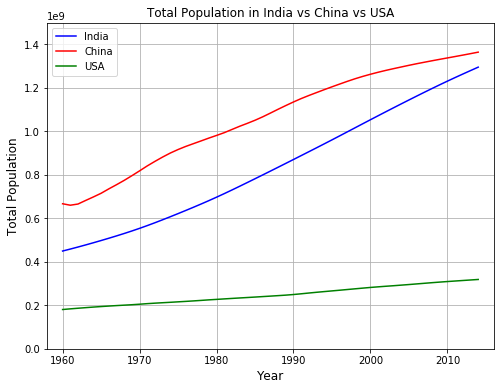

In [21]:
# Create line plots on Population Growth for each country India, China, and USA

# Defining the axes
x_ind = pop_ind_tot[['Year']]
y_ind = pop_ind_tot[['Value']]

x_chn = pop_chn_tot[['Year']]
y_chn = pop_chn_tot[['Value']]

x_usa = pop_usa_tot[['Year']]
y_usa = pop_usa_tot[['Value']]

fig = plt.figure(figsize=(8,6))

plt.plot(x_ind, y_ind, 'b-', label='India')
plt.plot(x_chn, y_chn, 'r-', label='China')
plt.plot(x_ind, y_usa, 'g-', label='USA')

# Create a legend
plt.legend(loc='upper left')

# Label the axes
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Population', fontsize=12)

# Label the plot
plt.title('Total Population in India vs China vs USA')

# To make more honest, starting y axis at 0
plt.axis([1958, 2016, 0, 1500000000])
plt.grid(True)

plt.show(fig)

### Finding 3: ###
Total Population, measured as annualized growth of survey mean per capita real income or consumption, is increasing at higher rates in the developing countries like India and China, as compared to USA. In USA Total Population is increasing very gently as it seems per capita real income or consumption is already available to most of the population and hence further increament is rather stable.


Next, finding relation between **Population Density** and **Population Growth** in the population data of **India**:

In [22]:
# Bringing the rows of the tables Population Density and Population Growth in one DataFrame for finding correlation:

ind_den_gth = pd.merge(pop_ind_den, pop_ind_gth, on=['Year', 'Year'])
ind_den_gth.head()

,CountryName_x,CountryCode_x,IndicatorName_x,IndicatorCode_x,Year,Value_x,CountryName_y,CountryCode_y,IndicatorName_y,IndicatorCode_y,Value_y
0,India,IND,Population density (people per sq. km of land ...,EN.POP.DNST,1961,154.275864,India,IND,Population growth (annual %),SP.POP.GROW,1.988187
1,India,IND,Population density (people per sq. km of land ...,EN.POP.DNST,1962,157.424902,India,IND,Population growth (annual %),SP.POP.GROW,2.020621
2,India,IND,Population density (people per sq. km of land ...,EN.POP.DNST,1963,160.679256,India,IND,Population growth (annual %),SP.POP.GROW,2.046165
3,India,IND,Population density (people per sq. km of land ...,EN.POP.DNST,1964,164.029246,India,IND,Population growth (annual %),SP.POP.GROW,2.063456
4,India,IND,Population density (people per sq. km of land ...,EN.POP.DNST,1965,167.470047,India,IND,Population growth (annual %),SP.POP.GROW,2.075977


In [23]:
cols = ind_den_gth[['Value_x', 'Value_y']]

cols.corr()

,Value_x,Value_y
Value_x,1.000000,-0.852323
Value_y,-0.852323,1.000000


### Finding 4: ###
Negative correlation values indicate that Population Density and Population Growth (in India data) are **inversely correlated**, i.e., in India as Population Density increases, Population Growth however decreases.<br />

Let's see this relation in a line plot too, as shown below.

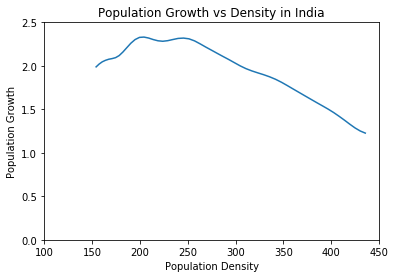

In [24]:
# Defining the axes from the merged DataFrame above
x1 = ind_den_gth[['Value_x']]
y1 = ind_den_gth[['Value_y']]

# Label the axes
plt.xlabel('Population Density')
plt.ylabel('Population Growth')

plt.title('Population Growth vs Density in India')

# Line plot
plt.plot(x1, y1)
plt.axis([100, 450, 0, 2.5])
plt.show()

### Comparing Polulation Data of Worldwide Countries in Scatter Plots ###
Plotting Population Density, Population Growth, and Total Population data of worldwide countries for a particular (latest) year **2014** in Scatter plots.

In [25]:
# Applying filters to select population data for a latest year

pop_indi1 = 'Population density'
pop_indi2 = 'Population growth'
pop_indi3 = 'Population, total'

filter1 = data['IndicatorName'].str.contains(pop_indi1)
filter2 = data['IndicatorName'].str.contains(pop_indi2)
filter3 = data['IndicatorName'].str.contains(pop_indi3)
filter4 = data['Year'] == 2014      # Looking for data for the latest year available

den_2014 = data[filter1 & filter4]
gth_2014 = data[filter2 & filter4]
tot_2014 = data[filter3 & filter4]

den_2014.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534494,Arab World,ARB,Population density (people per sq. km of land ...,EN.POP.DNST,2014,28.284334
5534742,Caribbean small states,CSS,Population density (people per sq. km of land ...,EN.POP.DNST,2014,17.323836
5535061,Central Europe and the Baltics,CEB,Population density (people per sq. km of land ...,EN.POP.DNST,2014,93.709435
5535348,East Asia & Pacific (all income levels),EAS,Population density (people per sq. km of land ...,EN.POP.DNST,2014,92.839683
5535746,East Asia & Pacific (developing only),EAP,Population density (people per sq. km of land ...,EN.POP.DNST,2014,126.974025


In [26]:
gth_2014.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534495,Arab World,ARB,Population growth (annual %),SP.POP.GROW,2014,2.168099
5534743,Caribbean small states,CSS,Population growth (annual %),SP.POP.GROW,2014,0.540954
5535062,Central Europe and the Baltics,CEB,Population growth (annual %),SP.POP.GROW,2014,-0.249333
5535349,East Asia & Pacific (all income levels),EAS,Population growth (annual %),SP.POP.GROW,2014,0.676464
5535747,East Asia & Pacific (developing only),EAP,Population growth (annual %),SP.POP.GROW,2014,0.727007


In [27]:
tot_2014.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534501,Arab World,ARB,"Population, total",SP.POP.TOTL,2014,3.852725e+08
5534747,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,2014,7.013555e+06
5535067,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,2014,1.034551e+08
5535354,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,2014,2.264080e+09
5535752,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,2014,2.020657e+09


### Plotting Population Density ###
Since ploting the Population Density of all the 250+ countries would clutter the figure, hence selecting only the countries with Popultion Density greater than a particulat value.

In [28]:
# Selecting Popultion Density greater than the value 400 (selected with trial and error)

sel_den_2014 = den_2014.loc[den_2014['Value'] > 400]
sel_den_2014.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5549989,Aruba,ABW,Population density (people per sq. km of land ...,EN.POP.DNST,2014,574.672222
5552099,Bahrain,BHR,Population density (people per sq. km of land ...,EN.POP.DNST,2014,1768.740260
5552608,Bangladesh,BGD,Population density (people per sq. km of land ...,EN.POP.DNST,2014,1222.075079
5553000,Barbados,BRB,Population density (people per sq. km of land ...,EN.POP.DNST,2014,659.023256
5555303,Bermuda,BMU,Population density (people per sq. km of land ...,EN.POP.DNST,2014,1303.620000


In [29]:
sel_den_2014.shape

(25, 6)

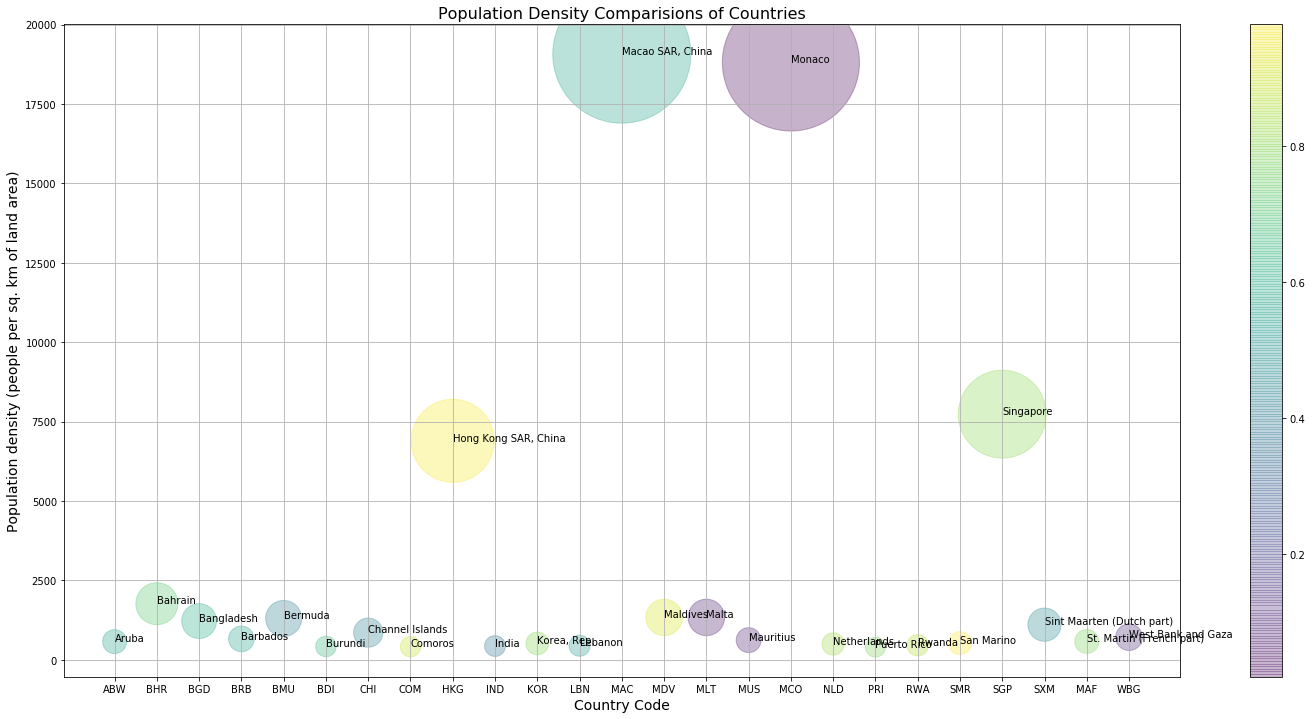

In [30]:
# Create a scatter plot on Population Density

cntry = sel_den_2014['CountryName'].values

x = sel_den_2014['CountryCode'].values 
y = sel_den_2014['Value'].values

rng = np.random.RandomState(0)
colors = rng.rand(25)
sizes = y

fig = plt.figure(figsize=(25,12))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale
plt.grid(True)
 
# Add annotations one by one with a loop

for i, name in enumerate(cntry):
    plt.annotate(cntry[i], xy=(x[i], y[i]), fontsize=10)

plt.xlabel('Country Code', fontsize=14)
plt.ylabel(sel_den_2014['IndicatorName'].iloc[0], fontsize=14)
plt.title('Population Density Comparisions of Countries', fontsize=16)

plt.show()

### Finding 5: ###
From the above plot it is clear that smaller countries like Macao, Monaco, followed by Singapore, Hong Kong, etc., have very high Population Density in comparison to bigger and highly populated countries like India. (Please see the position of India in the plot.)

### Plotting Population Growth ###
Since ploting the Population Growth of all the 250+ countries would clutter the figure, hence selecting only the countries with Popultion Growth greater than a particulat value.

In [31]:
# Selecting Popultion Growth greater than the value 2.7 (selected with trial and error)

sel_gth_2014 = gth_2014.loc[gth_2014['Value'] > 2.7]
sel_gth_2014.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5538039,Heavily indebted poor countries (HIPC),HPC,Population growth (annual %),SP.POP.GROW,2014,2.780614
5540926,Low income,LIC,Population growth (annual %),SP.POP.GROW,2014,2.720336
5544971,Sub-Saharan Africa (all income levels),SSF,Population growth (annual %),SP.POP.GROW,2014,2.744702
5545374,Sub-Saharan Africa (developing only),SSA,Population growth (annual %),SP.POP.GROW,2014,2.744588
5546715,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2014,3.033473


In [32]:
sel_gth_2014.shape

(28, 6)

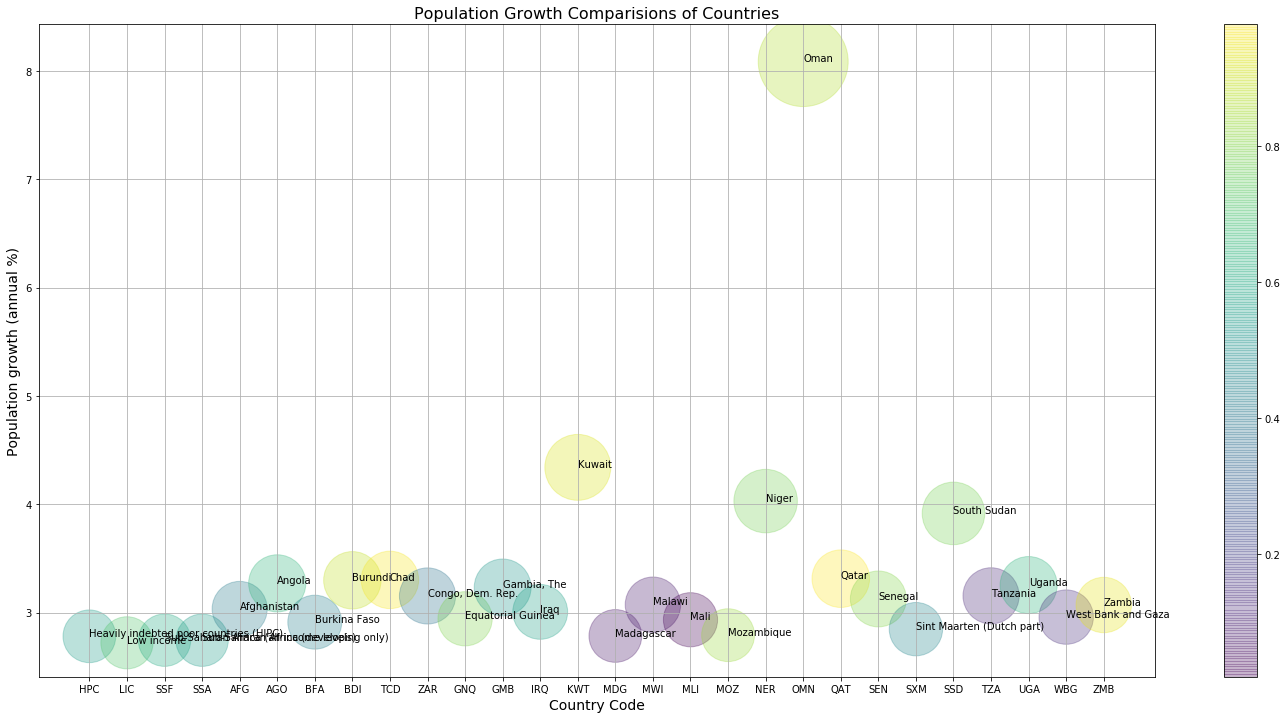

In [33]:
# Create a scatter plot on Population Growth

cntry = sel_gth_2014['CountryName'].values

x = sel_gth_2014['CountryCode'].values 
y = sel_gth_2014['Value'].values

rng = np.random.RandomState(0)
colors = rng.rand(28)
sizes = 1000 * y

fig = plt.figure(figsize=(25,12))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale
plt.grid(True)
 
# Add annotations one by one with a loop

for i, name in enumerate(cntry):
    plt.annotate(cntry[i], xy=(x[i], y[i]), fontsize=10)

plt.xlabel('Country Code', fontsize=14)
plt.ylabel(sel_gth_2014['IndicatorName'].iloc[0], fontsize=14)
plt.title('Population Growth Comparisions of Countries', fontsize=16)

plt.show()

### Finding 6: ###
Again, Population Growth is more obvious in smaller countries like Oman, Kuwait, etc., in comparison to the bigger and highly populated countries like India, China, etc.

### Plotting Total Population ###
Since ploting the Total Population of all the 250+ countries would clutter the figure, hence selecting only some selected countries of our interest for the comparison.

In [34]:
tot_2014.head(12)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534501,Arab World,ARB,"Population, total",SP.POP.TOTL,2014,3.852725e+08
5534747,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,2014,7.013555e+06
5535067,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,2014,1.034551e+08
5535354,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,2014,2.264080e+09
5535752,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,2014,2.020657e+09
5536185,Euro area,EMU,"Population, total",SP.POP.TOTL,2014,3.387339e+08
5536580,Europe & Central Asia (all income levels),ECS,"Population, total",SP.POP.TOTL,2014,9.031106e+08
5537046,Europe & Central Asia (developing only),ECA,"Population, total",SP.POP.TOTL,2014,2.643507e+08
5537499,European Union,EUU,"Population, total",SP.POP.TOTL,2014,5.083145e+08
5537767,Fragile and conflict affected situations,FCS,"Population, total",SP.POP.TOTL,2014,4.729547e+08


The DataFrame **tot_2014** contains some non-countries as groups like "East Asia & Pacific (developing only)", "High income", etc.<br/>

So, selecting only some specific and known countries of our interest for the comparision.

In [35]:
# Selecting a country just for checking

tot_2014.loc[tot_2014['CountryCode'] == 'EMU']

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5536185,Euro area,EMU,"Population, total",SP.POP.TOTL,2014,338733933.0


In [36]:
# Selecting following specific and known countries of our interest

sel_cntry = ['IND', 'CHN', 'USA', 'BRA', 'IDN', 'PAK', 'NGA', 'RUS', 'ARB',
             'AUS', 'CAN', 'MEX', 'SGP', 'HKG', 'BGD', 'MAC', 'OMN', 'BHR']

sel_tot_2014 = tot_2014[tot_2014.CountryCode.isin(sel_cntry)]

sel_tot_2014.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534501,Arab World,ARB,"Population, total",SP.POP.TOTL,2014,385272539.0
5550368,Australia,AUS,"Population, total",SP.POP.TOTL,2014,23490736.0
5552106,Bahrain,BHR,"Population, total",SP.POP.TOTL,2014,1361930.0
5552617,Bangladesh,BGD,"Population, total",SP.POP.TOTL,2014,159077513.0
5558180,Brazil,BRA,"Population, total",SP.POP.TOTL,2014,206077898.0


In [37]:
sel_tot_2014.shape

(18, 6)

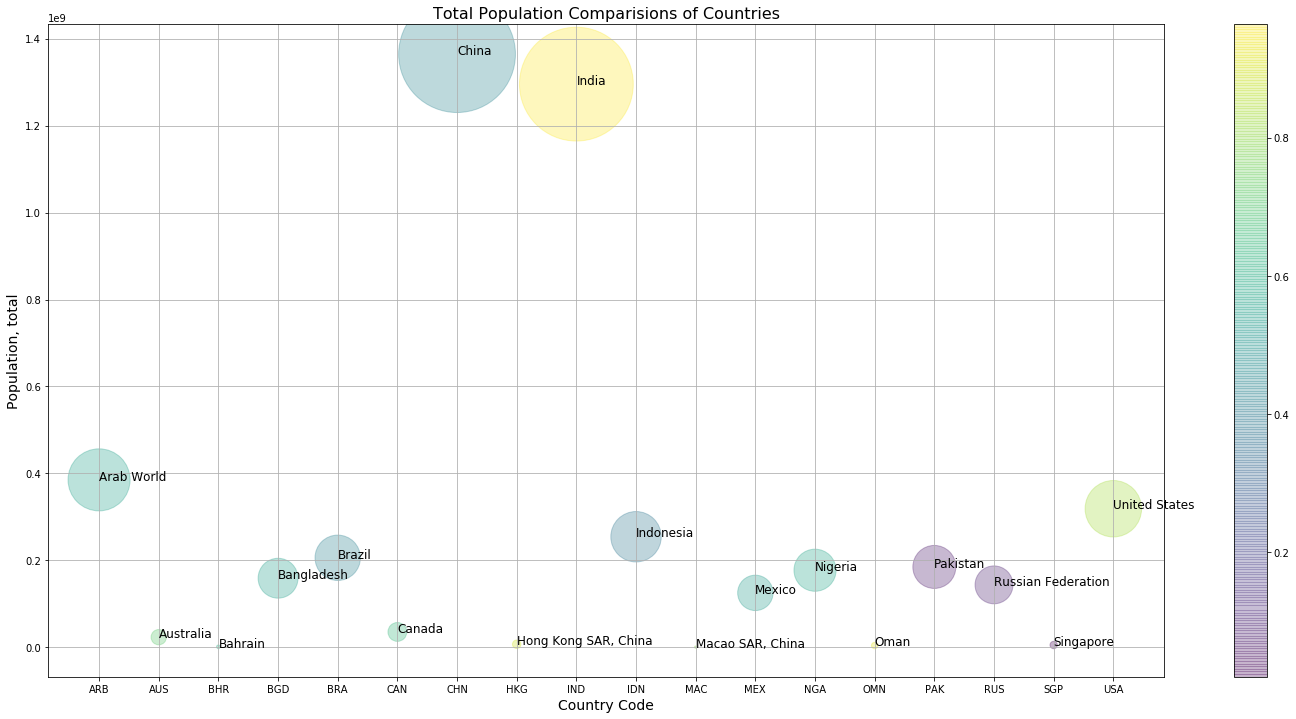

In [38]:
# Create a scatter plot on Population Total

cntry = sel_tot_2014['CountryName'].values

x = sel_tot_2014['CountryCode'].values 
y = sel_tot_2014['Value'].values

rng = np.random.RandomState(0)
colors = rng.rand(18)
sizes = y/100000

fig = plt.figure(figsize=(25,12))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale
plt.grid(True)
 
# Add annotations one by one with a loop

for i, name in enumerate(cntry):
    plt.annotate(cntry[i], xy=(x[i], y[i]), fontsize=12)

plt.xlabel('Country Code', fontsize=14)
plt.ylabel(sel_tot_2014['IndicatorName'].iloc[0], fontsize=14)
plt.title('Total Population Comparisions of Countries', fontsize=16)

plt.show()

### Finding 7: ###
The Total Population count for China and India have very high values than rest of the countries of the world. Please check the position of other bigger countries like Russia, Canada, USA, Brazil, and Australia in the plot.<br />

Also please note that the gap in Total Population values between China and India and rest of the countries of the world are very wide.